In [1]:
from google.colab import files
upload = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


# 0. Importing the important modules

In [3]:
!pip install category_encoders

     |████████████████████████████████| 81kB 4.4MB/s 


In [5]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile
from sklearn import metrics
from sklearn.metrics import classification_report
import category_encoders as ce
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#unsupervised learning library
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.spatial.distance import cdist, pdist 
from sklearn.metrics import silhouette_score
from sklearn.svm import LinearSVC
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, ward, average, complete

from sklearn.tree import plot_tree
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
data = pd.read_csv('hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# 1. Problem Framing

Case study notes :

- Within the hotel business, there are many accounts where customers would cancel/check in late to thier room.
- These off timings has caused the bussiness a reduction in potential revenue through opportunity cost.
- in an attempt to solve this issue a ML model can be made to try and predict the users behavior to anticipate a cancelled order.

**Business objective apa yang hendak dicapai melalui proyek ini?**

- Tujuan project ini adalah untuk 
mengurangi opportunity cost dan membuat customer management lebih efficient.

**Keluaran (output) seperti apa yang akan dihasilkan dari proyek ini dan bagaimana end user atau stakeholder akan memanfaatkan keluaran tersebut?**

- User model bisa mengambil customer lebih sering dari mengambil keuntungan dari waktu luang menunggu customer yang tidak datang/telat.
- Dari oportunitas mendapat customer yang lebih banyak bisnis sekarang bisa
  - mendpat lebih banyak revenue.
  - oportunitas untuk membawa nama baik bisnis (branding).

**Machine learning task apa yang akan dikerjakan? (supervised/unsupervised learning, classification/regression/clustering/dimensionality reduction problem dsb.)**

- model model yang akan dipakai adalah
  - Classification
  - Regression 

**Performance measure apa yang akan digunakan di dalam proyek ini?**

- Accuracy score = Merupakan rasio prediksi Benar (positif dan negatif) dengan keseluruhan data.
- Percision = Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf.
- Recall = Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif. 
- F1 score = performance kesuluruhan.

**Risiko seperti apa yang mungkin diakibatkan oleh kesalahan prediksi dari model Anda?**

Risiko salah memprediksi sesuatu akan agak fatal bagi bisnis.  Pelanggan akan mengharapkan hotel untuk menunggu.  Industri perhotelan beroperasi atas dasar keramah tamahan di mana jika pelanggan memegang lebih banyak kekuatan dalam dinamika itu dianggap sebagai hotel yang lebih baik.  Ini semakin diperparah dalam franchise yang lebih besar dan merek-merek mewah.  Jika model salah memprediksi dan ada bentrokan jadwal, branding hotel bisa ternoda karena itu adalah tugas mereka untuk menunggu pelanggan dan memberi service yang terbaik.

# 2. EDA

In [8]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
data.info()
# cek datatype semua feature
# dari data ini kita bisa mulai planning feture apa yang harus di encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [13]:
data.isnull().sum()
# dari cek Nan Data kita bisa lihat bahwa ada banyak null value dalam feature [company, agent & agent]

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [16]:
data.shape

(119390, 32)

**Kita akan mulai EDA ini dengan analisa fitur fitur dan target yang ada di dataset tersebut.**

* dari plot ini kita bisa liat bahawa 2/3 hotel berada di kota dan 1/3 di resort * 


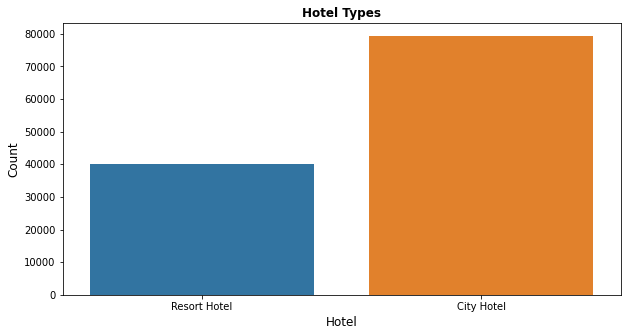

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='hotel', data = data)
plt.title('Hotel Types', weight='bold')
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Count', fontsize=12)

dari plot ini kita bisa liat bahawa 2/3 hotel berada di kota dan 1/3 di resort

Text(0, 0.5, 'Canceled or Not Canceled')

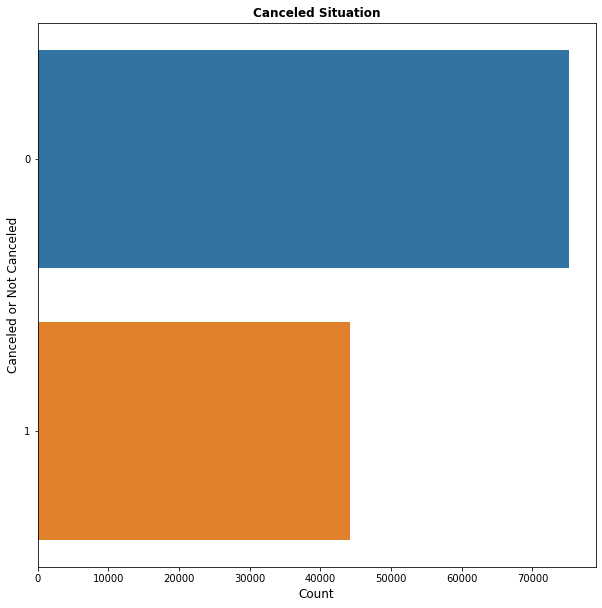

In [28]:
plt.figure(figsize=(10,10))
sns.countplot(y='is_canceled', data= data)
plt.title('Canceled Situation', weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Canceled or Not Canceled', fontsize=12)

kita bisa lihat bahwa kebanyakan order tidak di cancel, tetapi jumlahnya masih cukup besar dan melebihi 1/3 keseluruah data

* plot ini menjelaskan corelasi lead time , arrival dengan target "is_cancelled" *


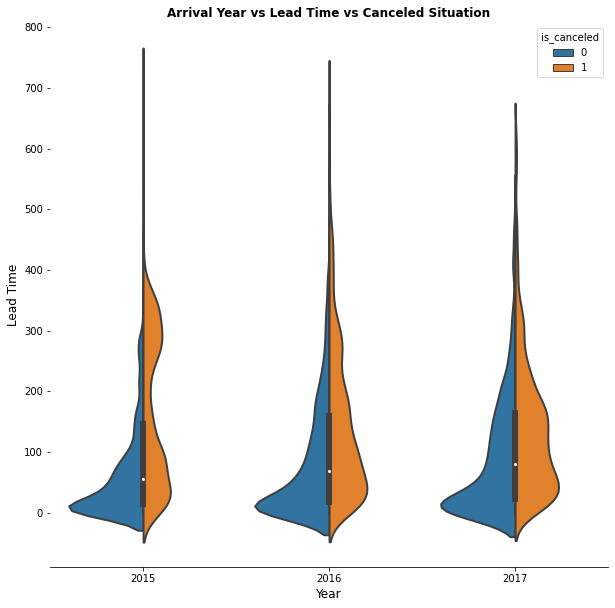

In [29]:
plt.figure(figsize=(10,10))
sns.violinplot(x='arrival_date_year', y ='lead_time', hue="is_canceled", data=data, bw=.2,
               cut=2, linewidth=2, iner= 'box', split = True)
sns.despine(left=True)
plt.title('Arrival Year vs Lead Time vs Canceled Situation', weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Lead Time', fontsize=12)

print('* plot ini menjelaskan corelasi lead time , arrival dengan target "is_cancelled" *')

Distribusi data cancelled agak berbeda tahun per tahun, tetapi data yang tidak cancel kelihatanya stabil. untuk semua tahun dan situasi booking, jumlah lead time yang besar membuat mean lebih tinggi. kita bisa lihat mean lebih tinggi daripada median

Text(0, 0.5, 'Count')

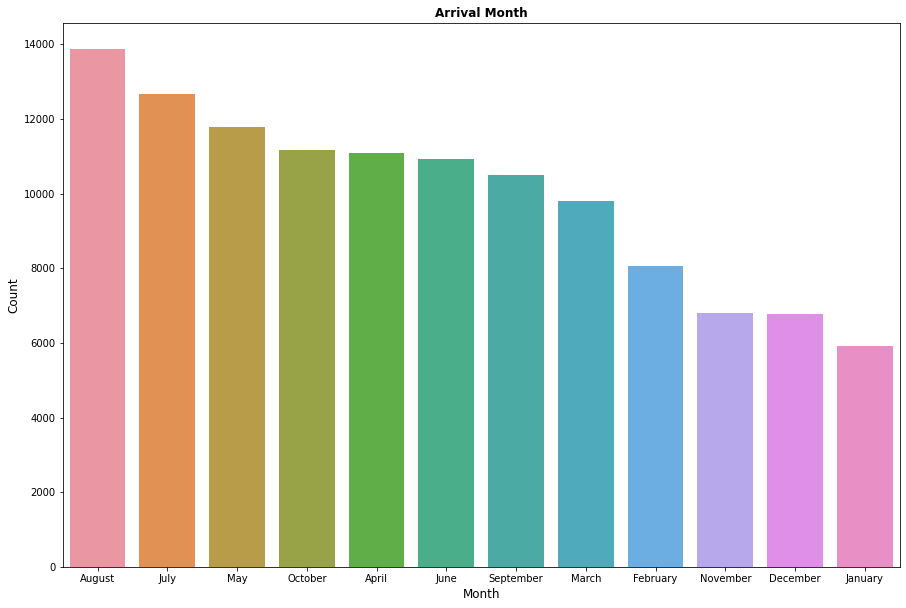

In [30]:
plt.figure(figsize=(15,10))
sns.countplot(x='arrival_date_month', data = data,
              order=pd.value_counts(data['arrival_date_month']).index)
plt.title('Arrival Month', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)

Dari plot ini kita bisa lihat bulan yang paling sibuk adalah bulan August dan bulan yang paling sepi adalah January

Text(0, 0.5, 'Count')

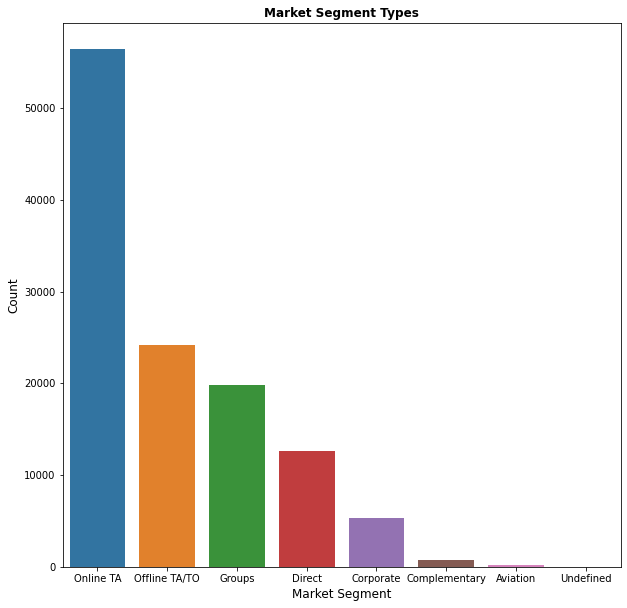

In [31]:
plt.figure(figsize=(10,10))
sns.countplot(data['market_segment'], 
              order=pd.value_counts(data['market_segment']).index)
plt.title('Market Segment Types', weight='bold')
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)

dari plot yang di atas kita bisa lihat bahwa online TA adalah market segmen yang paling besar. Untuk sekarang kita bisa bikin asumsi karena gampang untuk cancel order lewat online mungkin itu alasanya is_cancelled sangat besar.

In [32]:
data.corr(method='spearman').round(2)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.00,0.32,0.02,0.01,-0.01,-0.00,0.04,0.07,-0.00,-0.03,-0.08,0.27,-0.12,-0.19,-0.11,-0.01,0.10,0.05,-0.20,-0.26
lead_time,0.32,1.00,0.06,0.11,0.01,0.16,0.30,0.19,-0.02,-0.02,-0.19,0.17,-0.19,-0.01,-0.12,0.29,0.15,0.02,-0.14,-0.07
arrival_date_year,0.02,0.06,1.00,-0.54,-0.00,0.02,0.04,0.04,0.06,-0.01,0.01,-0.26,0.04,0.02,0.11,0.23,-0.08,0.22,-0.02,0.12
arrival_date_week_number,0.01,0.11,-0.54,1.00,0.06,0.03,0.03,0.03,0.01,0.01,-0.03,0.09,-0.04,0.01,-0.06,-0.06,-0.00,0.07,0.00,0.02
arrival_date_day_of_month,-0.01,0.01,-0.00,0.06,1.00,-0.01,-0.02,0.00,0.02,0.00,-0.01,-0.01,-0.00,0.01,0.00,0.05,0.03,0.03,0.01,0.00
stays_in_weekend_nights,-0.00,0.16,0.02,0.03,-0.01,1.00,0.24,0.13,0.05,0.02,-0.10,-0.05,-0.08,0.04,0.13,0.08,-0.07,0.05,-0.02,0.08
stays_in_week_nights,0.04,0.30,0.04,0.03,-0.02,0.24,1.00,0.15,0.05,0.03,-0.13,-0.06,-0.12,0.06,0.17,0.25,0.01,0.09,-0.03,0.08
adults,0.07,0.19,0.04,0.03,0.00,0.13,0.15,1.00,0.07,0.03,-0.18,-0.04,-0.21,-0.08,-0.06,0.23,-0.04,0.28,0.02,0.16
children,-0.00,-0.02,0.06,0.01,0.02,0.05,0.05,0.07,1.00,0.04,-0.03,-0.06,-0.04,0.07,0.04,0.03,-0.05,0.27,0.06,0.10
babies,-0.03,-0.02,-0.01,0.01,0.00,0.02,0.03,0.03,0.04,1.00,-0.01,-0.02,-0.01,0.12,0.04,0.02,-0.01,0.03,0.04,0.09


Dari correlation matrix di atas kita bisa lihat ada berberapa fitur yang corelasinya lebih tinggi. dari matrix di atas dan analisa fitur yang lain kita akan seleksi fitur.

- lead time
- previous_cancellations
- days_in_waiting_list
- market_segment
- arrival_date_month
- booking_changes
- previous_bookings_not_canceled

# 2. Data Preperation

In [34]:
df = data[['lead_time', 'previous_cancellations','previous_bookings_not_canceled','days_in_waiting_list','market_segment', 'arrival_date_month','booking_changes','is_canceled']]

In [35]:
df

,lead_time,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,market_segment,arrival_date_month,booking_changes,is_canceled
0,342,0,0,0,Direct,July,3,0
1,737,0,0,0,Direct,July,4,0
2,7,0,0,0,Direct,July,0,0
3,13,0,0,0,Corporate,July,0,0
4,14,0,0,0,Online TA,July,0,0
...,...,...,...,...,...,...,...,...
119385,23,0,0,0,Offline TA/TO,August,0,0
119386,102,0,0,0,Online TA,August,0,0
119387,34,0,0,0,Online TA,August,0,0
119388,109,0,0,0,Online TA,August,0,0


In [36]:
# ordinal encoding
# Ordinal encoding allows you to categorize your data accordingly red = 1, blue = 2, green = 3

# check all the categories within selected column
df['market_segment'].unique()


array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [38]:
# assign int to each category
ordinal_mapping = [{'col':'market_segment','mapping':{None:0,'Direct':1,'Corporate':2,'Online TA':3,'Offline TA/TO':4,'Complementary':5,'Groups':6,'Undefined':7,'Aviation':8}}]

# creating encoder
ordinal_encoder = ce.OrdinalEncoder(cols='market_segment',mapping=ordinal_mapping)

# fitting encoder
df_ordinal_market = ordinal_encoder.fit_transform(df['market_segment'])
df_ordinal_market

,market_segment
0,1
1,1
2,1
3,2
4,3
...,...
119385,4
119386,3
119387,3
119388,3


In [40]:
# assign int to each category
ordinal_mapping = [{'col':'arrival_date_month','mapping':{None:0,'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}}]

# creating encoder
ordinal_encoder = ce.OrdinalEncoder(cols='arrival_date_month',mapping=ordinal_mapping)

# fitting encoder
df_ordinal_month = ordinal_encoder.fit_transform(df['arrival_date_month'])
df_ordinal_month

,arrival_date_month
0,7
1,7
2,7
3,7
4,7
...,...
119385,8
119386,8
119387,8
119388,8


In [41]:
df_concat = pd.concat([df_ordinal_market,df_ordinal_month,df[['lead_time', 'previous_cancellations','previous_bookings_not_canceled','days_in_waiting_list','booking_changes','is_canceled']]],axis=1)
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   market_segment                  119390 non-null  int64
 1   arrival_date_month              119390 non-null  int64
 2   lead_time                       119390 non-null  int64
 3   previous_cancellations          119390 non-null  int64
 4   previous_bookings_not_canceled  119390 non-null  int64
 5   days_in_waiting_list            119390 non-null  int64
 6   booking_changes                 119390 non-null  int64
 7   is_canceled                     119390 non-null  int64
dtypes: int64(8)
memory usage: 7.3 MB


# 4.Model Training

In [42]:
X = df_concat.drop('is_canceled',axis=1)
y = df_concat['is_canceled']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

In [44]:
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(max_depth=5)
logreg = LogisticRegression(max_iter=1000)

In [45]:
knn = knn.fit(X_train,y_train)
knn_y_pred = knn.predict(X_test)
print("Accuracy KNN:",metrics.accuracy_score(y_test, knn_y_pred))

Accuracy KNN: 0.7536923807130692


In [46]:
print(classification_report(y_test,knn_y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81     22496
           1       0.70      0.60      0.64     13321

    accuracy                           0.75     35817
   macro avg       0.74      0.72      0.73     35817
weighted avg       0.75      0.75      0.75     35817



In [48]:
#logreg
logreg = logreg.fit(X_train,y_train)
logreg_y_pred = logreg.predict(X_test)
print("Accuracy logreg:",metrics.accuracy_score(y_test, logreg_y_pred))

Accuracy logreg: 0.7065639221598682


In [49]:
print(classification_report(y_test,logreg_y_pred))

              precision    recall  f1-score   support

           0       0.70      0.92      0.80     22496
           1       0.72      0.35      0.47     13321

    accuracy                           0.71     35817
   macro avg       0.71      0.63      0.63     35817
weighted avg       0.71      0.71      0.68     35817



In [50]:
#tree
dt.fit(X_train,y_train)
tree_y_pred = dt.predict(X_test)
print("Accuracy tree:",metrics.accuracy_score(y_test, tree_y_pred))

Accuracy tree: 0.7167825334338442


In [51]:
print(classification_report(y_test,tree_y_pred))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81     22496
           1       0.77      0.34      0.47     13321

    accuracy                           0.72     35817
   macro avg       0.74      0.64      0.64     35817
weighted avg       0.73      0.72      0.68     35817



# 4.1 Model Training

Text(0, 0.5, 'Cross-Validated Accuracy')

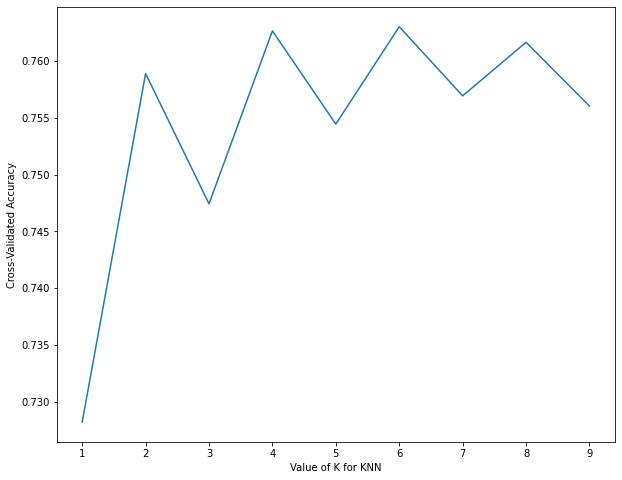

In [52]:
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
scores

scores.mean()

# search for an optimal value of K for KNN

# list of integers 1 to 10
# integers we want to try
k_range = range(1,10)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

plt.figure(figsize=(10,8))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
#from the plot we can select the most accurate K vlaue

K value yang paling akurat adalah 4

In [55]:
scores = cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy')
scores 

array([0.71105528, 0.7189519 , 0.72074659, 0.71473017, 0.71568745,
       0.7110207 , 0.71329424, 0.71736269, 0.71305492, 0.71748235])

In [56]:
scores.mean()

0.7153386292477104

Text(0, 0.5, 'Cross-Validated Accuracy')

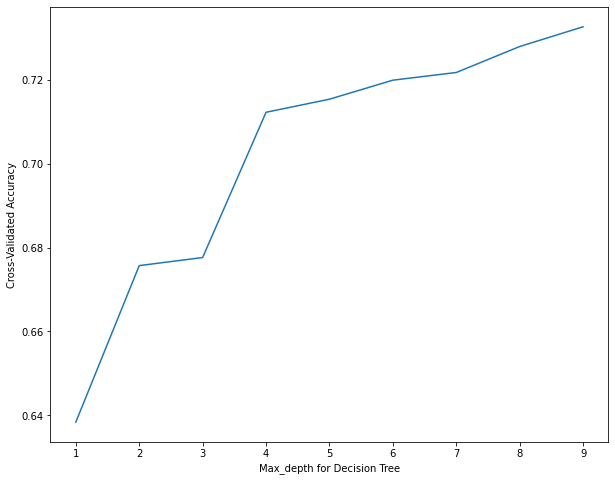

In [57]:
depth_range = range(1, 10)

# list of scores from k_range
max_depth_scores = []

# 1. we will loop through reasonable values of max_depth
for d in depth_range:
    # 2. run decision tree with reasonable max_depth
    dt = DecisionTreeClassifier(max_depth=d)
    # 3. obtain cross_val_score for Decission Tree with max_depth
    scores = cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for tree to max_depth_scores list
    max_depth_scores.append(scores.mean())

plt.figure(figsize=(10,8))
plt.plot(depth_range, max_depth_scores)
plt.xlabel('Max_depth for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')
#from the selection of the decision tree select max depth

In [58]:
scores = cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy')
scores

scores.min(), scores.mean(), scores.max()

(0.7001675041876047, 0.704725259373215, 0.7105420605480436)

# 5 Evaluation, Model Selection, and Model Tuning



In [59]:
vc = VotingClassifier([('clf1',knn),('clf2',dt),('clf3',logreg)],voting='soft')

In [60]:
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('clf1',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=9,
                                                   p=2, weights='uniform')),
                             ('clf2',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=9,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_dec

In [63]:
vc_y_pred =  vc.predict(X_test)
print("Accuracy ensemble:",metrics.accuracy_score(y_test, vc_y_pred))

Accuracy ensemble: 0.770081246335539


In [65]:
print(classification_report(y_test,vc_y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84     22496
           1       0.82      0.49      0.61     13321

    accuracy                           0.77     35817
   macro avg       0.79      0.71      0.73     35817
weighted avg       0.78      0.77      0.75     35817



Dari sini kita bisa lihat bahwa mean accuracy ensemble masih lebih akurat dari individual dengan percision yang lumayan bagus

In [66]:
scores = cross_val_score(vc, X_train, y_train, cv=10, scoring='accuracy')
scores 

array([0.76740847, 0.76728883, 0.76764776, 0.77671413, 0.76546608,
       0.7657054 , 0.76618404, 0.76917554, 0.77085078, 0.76833792])

# Ada Boost Classifier

In [76]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [77]:
adab = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
adab.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [81]:
ada_pred = adab.predict(X_test)

In [82]:
print("Accuracy Ada Boost Classifier:",metrics.accuracy_score(y_test, ada_pred))

Accuracy Ada Boost Classifier: 0.7258843565904459


# 6. Result, Conclusion, and Recommendation

Dari evaluation, model yang akan dipakai adalah model ensemble dengan soft voting. prediksi akan lebih robust karena memakai berberapa model. Dari segi akurasi masih bisa di tuning dan belum maximal dalam prediksi. model sekarang lebih bisa prediksi orang yang TIDAK akan cancel. mungkin sebagai end user ini lebih bisa prediksi high value customers yang pasti tidak akan cancel, dari system reward hotel mungkin bisa mempromosikan loyalty program dengan customer, customer ini yang bakal jarang cancel.